In [1]:
#= This is a multi-line comment in Julia.
Isn't it? =#

We install the required packages

In [2]:
using Pkg
Pkg.add("DataFrames")

   Resolving package versions...


  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Project.toml`
  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Manifest.toml`


In [3]:
Pkg.add("CSV")
Pkg.add("Queryverse")

   Resolving package versions...


  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Project.toml`
  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Manifest.toml`


   Resolving package versions...


  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Project.toml`
  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Manifest.toml`


In [4]:
Pkg.add("Downloads")

   Resolving package versions...


  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Project.toml`
  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Manifest.toml`


In [5]:
# Load the required packages
using DataFrames
using CSV
using Pkg
using Queryverse

In [6]:
Pkg.add("FreqTables")

   Resolving package versions...


  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Project.toml`
  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Manifest.toml`


In [7]:
using FreqTables # To calculate frequencies

In [8]:
Pkg.add("Random")

   Resolving package versions...


  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Project.toml`
  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Manifest.toml`


In [9]:
using Random

In [10]:
Pkg.add("InlineStrings") # To generate memory-efficient large collections of strings

   Resolving package versions...


  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Project.toml`
  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Manifest.toml`


In [11]:
using InlineStrings

In [12]:
Pkg.add("Statistics")

   Resolving package versions...


  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Project.toml`
  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Manifest.toml`


In [13]:
using Statistics

In [14]:
# Load the dataset
df = DataFrame(CSV.File("serious-injury-outcome-indicators-2000-2020-CSV.csv"))

Row,Series_reference,Period,Type,Data_value,Lower_CI,Upper_CI,Units,Indicator,Cause,Validation,Population,Age,Severity
,String7,String7,String15,Float64,Float64,Float64,String,String,String31,String15,String15,String15,String31
1,W_A11,2000-02,Moving average,59.6667,50.9258,68.4075,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
2,W_A11,2001-03,Moving average,60.0,51.2348,68.7652,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
3,W_A11,2002-04,Moving average,59.0,50.3081,67.6919,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
4,W_A11,2003-05,Moving average,59.0,50.3081,67.6919,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
5,W_A11,2004-06,Moving average,61.3333,52.4713,70.1954,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
6,W_A11,2005-07,Moving average,63.0,54.0183,71.9817,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
7,W_A11,2006-08,Moving average,57.3333,48.7651,65.9016,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
8,W_A11,2007-09,Moving average,63.6667,54.6376,72.6957,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
9,W_A11,2008-10,Moving average,64.0,54.9473,73.0527,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal


In [15]:
# Describe the dataframe
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Series_reference,,C_A21,,wf02,0,String7
2,Period,,2000,,2020,0,String7
3,Type,,Moving average,,Single year,0,String15
4,Data_value,490.518,0.713333,63.0,14141.0,0,Float64
5,Lower_CI,464.676,0.191677,50.9238,13907.9,0,Float64
6,Upper_CI,516.36,0.801232,72.9266,14374.1,0,Float64
7,Units,,Injuries,,Per thousand registered vehicles,0,String
8,Indicator,,Age-standardised rate,,Rate per thousand registered vehicles,0,String
9,Cause,,All,,Work,0,String31


In [16]:
first(df)

Row,Series_reference,Period,Type,Data_value,Lower_CI,Upper_CI,Units,Indicator,Cause,Validation,Population,Age,Severity
,String7,String7,String15,Float64,Float64,Float64,String,String,String31,String15,String15,String15,String31
1,W_A11,2000-02,Moving average,59.6667,50.9258,68.4075,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal


In [17]:
# Select only the ones that correspond to injuries
q1 = df |>
    @filter(_.Units == "Injuries" && _.Data_value <= 40.0) |>
    @orderby_descending(_.Data_value)

Series_reference,Period,Type,Data_value,Lower_CI,Upper_CI,Units,Indicator,Cause,Validation,Population,Age,Severity
"String7(""C_IN01"")","String7(""2004-06"")","String15(""Moving average"")",40.0,32.8432,47.1568,"""Injuries""","""Number""","String31(""Intentional"")","String15(""Validated"")","String15(""Children"")","String15(""0-14 years"")","String31(""Serious non-fatal"")"
"String7(""C_A21"")","String7(""2003-05"")","String15(""Moving average"")",40.0,32.8432,47.1568,"""Injuries""","""Number""","String31(""Assault"")","String15(""Validated"")","String15(""Children"")","String15(""0-14 years"")","String31(""Serious"")"
"String7(""a11"")","String7(""2017"")","String15(""Single year"")",40.0,27.6041,52.3959,"""Injuries""","""Number""","String31(""Assault"")","String15(""Validated"")","String15(""Whole pop"")","String15(""All ages"")","String31(""Fatal"")"
"String7(""in01"")","String7(""2005"")","String15(""Single year"")",40.0,27.6041,52.3959,"""Injuries""","""Number""","String31(""Intentional"")","String15(""Validated"")","String15(""Children"")","String15(""0-14 years"")","String31(""Serious non-fatal"")"
"String7(""in01"")","String7(""2012"")","String15(""Single year"")",40.0,27.6041,52.3959,"""Injuries""","""Number""","String31(""Intentional"")","String15(""Validated"")","String15(""Children"")","String15(""0-14 years"")","String31(""Serious non-fatal"")"
"String7(""in01"")","String7(""2016"")","String15(""Single year"")",40.0,27.6041,52.3959,"""Injuries""","""Number""","String31(""Intentional"")","String15(""Validated"")","String15(""Children"")","String15(""0-14 years"")","String31(""Serious non-fatal"")"
"String7(""in01"")","String7(""2019"")","String15(""Single year"")",40.0,27.6041,52.3959,"""Injuries""","""Number""","String31(""Intentional"")","String15(""Validated"")","String15(""Children"")","String15(""0-14 years"")","String31(""Serious non-fatal"")"
"String7(""a21"")","String7(""2017"")","String15(""Single year"")",40.0,27.6041,52.3959,"""Injuries""","""Number""","String31(""Assault"")","String15(""Validated"")","String15(""Children"")","String15(""0-14 years"")","String31(""Serious"")"
"String7(""p21"")","String7(""2017"")","String15(""Single year"")",40.0,27.6041,52.3959,"""Injuries""","""Number""","String31(""Pedestrian"")","String15(""Validated"")","String15(""Children"")","String15(""0-14 years"")","String31(""Serious"")"
"String7(""C_IN01"")","String7(""2011-13"")","String15(""Moving average"")",39.6667,32.5398,46.7936,"""Injuries""","""Number""","String31(""Intentional"")","String15(""Validated"")","String15(""Children"")","String15(""0-14 years"")","String31(""Serious non-fatal"")"


In [18]:
q1 |> DataFrame

Row,Series_reference,Period,Type,Data_value,Lower_CI,Upper_CI,Units,Indicator,Cause,Validation,Population,Age,Severity
,String7,String7,String15,Float64,Float64,Float64,String,String,String31,String15,String15,String15,String31
1,C_IN01,2004-06,Moving average,40.0,32.8432,47.1568,Injuries,Number,Intentional,Validated,Children,0-14 years,Serious non-fatal
2,C_A21,2003-05,Moving average,40.0,32.8432,47.1568,Injuries,Number,Assault,Validated,Children,0-14 years,Serious
3,a11,2017,Single year,40.0,27.6041,52.3959,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
4,in01,2005,Single year,40.0,27.6041,52.3959,Injuries,Number,Intentional,Validated,Children,0-14 years,Serious non-fatal
5,in01,2012,Single year,40.0,27.6041,52.3959,Injuries,Number,Intentional,Validated,Children,0-14 years,Serious non-fatal
6,in01,2016,Single year,40.0,27.6041,52.3959,Injuries,Number,Intentional,Validated,Children,0-14 years,Serious non-fatal
7,in01,2019,Single year,40.0,27.6041,52.3959,Injuries,Number,Intentional,Validated,Children,0-14 years,Serious non-fatal
8,a21,2017,Single year,40.0,27.6041,52.3959,Injuries,Number,Assault,Validated,Children,0-14 years,Serious
9,p21,2017,Single year,40.0,27.6041,52.3959,Injuries,Number,Pedestrian,Validated,Children,0-14 years,Serious


In [19]:
q1 |>
    @take(5)

Series_reference,Period,Type,Data_value,Lower_CI,Upper_CI,Units,Indicator,Cause,Validation,Population,Age,Severity
"String7(""C_IN01"")","String7(""2004-06"")","String15(""Moving average"")",40.0,32.8432,47.1568,"""Injuries""","""Number""","String31(""Intentional"")","String15(""Validated"")","String15(""Children"")","String15(""0-14 years"")","String31(""Serious non-fatal"")"
"String7(""C_A21"")","String7(""2003-05"")","String15(""Moving average"")",40.0,32.8432,47.1568,"""Injuries""","""Number""","String31(""Assault"")","String15(""Validated"")","String15(""Children"")","String15(""0-14 years"")","String31(""Serious"")"
"String7(""a11"")","String7(""2017"")","String15(""Single year"")",40.0,27.6041,52.3959,"""Injuries""","""Number""","String31(""Assault"")","String15(""Validated"")","String15(""Whole pop"")","String15(""All ages"")","String31(""Fatal"")"
"String7(""in01"")","String7(""2005"")","String15(""Single year"")",40.0,27.6041,52.3959,"""Injuries""","""Number""","String31(""Intentional"")","String15(""Validated"")","String15(""Children"")","String15(""0-14 years"")","String31(""Serious non-fatal"")"
"String7(""in01"")","String7(""2012"")","String15(""Single year"")",40.0,27.6041,52.3959,"""Injuries""","""Number""","String31(""Intentional"")","String15(""Validated"")","String15(""Children"")","String15(""0-14 years"")","String31(""Serious non-fatal"")"


In [20]:
squares = (1:1000).^2

1000-element Vector{Int64}:
       1
       4
       9
      16
      25
      36
      49
      64
      81
     100
       ⋮
  984064
  986049
  988036
  990025
  992016
  994009
  996004
  998001
 1000000

In [21]:
reverse(squares[end-4:end])

5-element Vector{Int64}:
 1000000
  998001
  996004
  994009
  992016

In [22]:
typeof(squares)

Vector{Int64} (alias for Array{Int64, 1})

In [23]:
squares = 1:10 |>
    @map(_=>_^2) |>
    Dict

Dict{Int64, Int64} with 10 entries:
  5  => 25
  4  => 16
  6  => 36
  7  => 49
  2  => 4
  10 => 100
  9  => 81
  8  => 64
  3  => 9
  1  => 1

In [24]:
# Named tuples
1:10 |> @map({number=_, num_squared=_^2})

number,num_squared
1,1
2,4
3,9
4,16
5,25
6,36
7,49
8,64
9,81
10,100


In [25]:
typeof(squares)

Dict{Int64, Int64}

In [26]:
squares[5]

25

In [27]:
x = Dict{Int64, Int64}()

Dict{Int64, Int64}()

In [28]:
x

Dict{Int64, Int64}()

In [29]:
x = [1,2,3,4,5]
y = [2,4,6,8,10]

5-element Vector{Int64}:
  2
  4
  6
  8
 10

In [30]:
z = Dict(zip(x,y))

Dict{Int64, Int64} with 5 entries:
  5 => 10
  4 => 8
  2 => 4
  3 => 6
  1 => 2

In [31]:
z = Dict(x .=> y)

Dict{Int64, Int64} with 5 entries:
  5 => 10
  4 => 8
  2 => 4
  3 => 6
  1 => 2

In [32]:
for k in keys(z)
    println(k)
end

5
4
2
3
1


In [33]:
# This will print the keyset but it is not a vector
keys(z)

KeySet for a Dict{Int64, Int64} with 5 entries. Keys:
  5
  4
  2
  3
  1

In [34]:
# We use collect to create a vector
k = collect(keys(z))
k

5-element Vector{Int64}:
 5
 4
 2
 3
 1

Now we extract the corresponding values from the dictionary:

In [35]:
v = collect(values(z))
v

5-element Vector{Int64}:
 10
  8
  4
  6
  2

In [36]:
# List comprehension
i = [x^2 for x in 1:1000]

1000-element Vector{Int64}:
       1
       4
       9
      16
      25
      36
      49
      64
      81
     100
       ⋮
  984064
  986049
  988036
  990025
  992016
  994009
  996004
  998001
 1000000

In [37]:
x = 1
product = 1

for x in 1:5
    product = product * x
end

println(product)

120


Calculate the sum

In [38]:
x = 1
sum = 0

for x in 1:5
    sum = sum + x
end

print(sum)

15

Now, we are going to do some work using examples from "Julia for Data Analysis" 

In [39]:
using Downloads

data = Downloads.download("https://raw.githubusercontent.com/\
sidooms/MovieTweetings/\
44c525d0c766944910686c60697203cda39305d6/\
snapshots/10K/movies.dat",
"movies.dat")

"movies.dat"

In [40]:
movie_data = readlines(data)

3096-element Vector{String}:
 "0002844::Fantômas - À l'ombre de la guillotine (1913)::Crime|Drama"
 "0007264::The Rink (1916)::Comedy|Short"
 "0008133::The Immigrant (1917)::Short|Comedy|Drama|Romance"
 "0012349::The Kid (1921)::Comedy|Drama|Family"
 "0013427::Nanook of the North (1922)::Documentary"
 "0014142::The Hunchback of Notre Dame (1923)::Drama|Romance"
 "0014538::Three Ages (1923)::Comedy"
 "0014872::Entr'acte (1924)::Short"
 "0015163::The Navigator (1924)::Action|Comedy"
 "0015324::Sherlock Jr. (1924)::Comedy|Fantasy"
 ⋮
 "2646378::The Frankenstein Theory (2013)::Horror|Sci-Fi"
 "2649128::Metro (2013)::Thriller"
 "2670226::Jîn (2013)::Drama"
 "2700330::The Two Escobars (2010)::Documentary"
 "2735466::Pickett's Charge (2012)::Short|Comedy|Drama|Family"
 "2748368::Neil (2013)::Short|Comedy"
 "2750600::A Different Tree (2013)::Short|Drama|Family"
 "2763252::Broken Night (2013)::Short|Drama"
 "2769592::Kiss Shot Truth or Dare (2013)::Short"

## String manipulation

This is a string vector. So, to get the first element:

In [41]:
first_line = string(first(movie_data, 1))

"[\"0002844::Fantômas - À l'ombre de la guillotine (1913)::Crime|Drama\"]"

In [42]:
genre = split(first_line, "::")[3]
genre = split(genre, "\"")[1]

"Crime|Drama"

In [43]:
contains(genre,"Drama")

true

In [44]:
startswith(genre, "Crime")

true

In [45]:
endswith(genre, "ma")

true

In [46]:
join(genre, "_")

"C_r_i_m_e_|_D_r_a_m_a"

In [47]:
uppercase(genre)

"CRIME|DRAMA"

In [48]:
lowercasefirst(genre)

"crime|Drama"

In [49]:
replace(genre, "Drama" => "Comedy")

"Crime|Comedy"

In [50]:
# To get part of the string, we use first. For example to extract Crime for genre:
first(genre, 5)

"Crime"

In [51]:
# To check for ASCII strings
println(isascii("hello"))
println(isascii("∀ x: x≥0"))

true
false


In [52]:
# Define a function to parse the lines of the file
function parseline(line::AbstractString)
    parts = split(line, "::")
    m = match(r"(.+) \((\d{4})\)", parts[2])
    return (id=parts[1],
            name=m[1],
            year=parse(Int, m[2]),
            genres=split(parts[3], "|"))
end

parseline (generic function with 1 method)

In [53]:
records = parseline.(movie_data)

3096-element Vector{NamedTuple{(:id, :name, :year, :genres), Tuple{SubString{String}, SubString{String}, Int64, Vector{SubString{String}}}}}:
 (id = "0002844", name = "Fantômas - À l'ombre de la guillotine", year = 1913, genres = ["Crime", "Drama"])
 (id = "0007264", name = "The Rink", year = 1916, genres = ["Comedy", "Short"])
 (id = "0008133", name = "The Immigrant", year = 1917, genres = ["Short", "Comedy", "Drama", "Romance"])
 (id = "0012349", name = "The Kid", year = 1921, genres = ["Comedy", "Drama", "Family"])
 (id = "0013427", name = "Nanook of the North", year = 1922, genres = ["Documentary"])
 (id = "0014142", name = "The Hunchback of Notre Dame", year = 1923, genres = ["Drama", "Romance"])
 (id = "0014538", name = "Three Ages", year = 1923, genres = ["Comedy"])
 (id = "0014872", name = "Entr'acte", year = 1924, genres = ["Short"])
 (id = "0015163", name = "The Navigator", year = 1924, genres = ["Action", "Comedy"])
 (id = "0015324", name = "Sherlock Jr.", year = 1924, genre

In [54]:
# To get the name of the first movie
records[1].name

"Fantômas - À l'ombre de la guillotine"

In [55]:
# To get the year of the first movie
records[1].year

1913

Now, we create an array to store all the genres

In [56]:
genres = String[]

String[]

In [57]:
for record in records
    append!(genres, record.genres)
end

In [58]:
genres

8121-element Vector{String}:
 "Crime"
 "Drama"
 "Comedy"
 "Short"
 "Short"
 "Comedy"
 "Drama"
 "Romance"
 "Comedy"
 "Drama"
 ⋮
 "Family"
 "Short"
 "Comedy"
 "Short"
 "Drama"
 "Family"
 "Short"
 "Drama"
 "Short"

In [59]:
genre_frequencies = freqtable(genres)

25-element Named Vector{Int64}
Dim1        │ 
────────────┼─────
            │   14
Action      │  635
Adventure   │  443
Animation   │  137
Biography   │  166
Comedy      │ 1001
Crime       │  550
Documentary │  126
⋮                ⋮
News        │    4
Romance     │  558
Sci-Fi      │  305
Short       │   46
Sport       │   84
Thriller    │  910
War         │  126
Western     │   35

In [60]:
sort(genre_frequencies, rev=true)

25-element Named Vector{Int64}
Dim1        │ 
────────────┼─────
Drama       │ 1583
Comedy      │ 1001
Thriller    │  910
Action      │  635
Romance     │  558
Crime       │  550
Adventure   │  443
Horror      │  325
⋮                ⋮
Sport       │   84
Music       │   83
Musical     │   58
Short       │   46
Western     │   35
            │   14
Film-Noir   │   13
News        │    4

In [61]:
genre_frequencies

25-element Named Vector{Int64}
Dim1        │ 
────────────┼─────
            │   14
Action      │  635
Adventure   │  443
Animation   │  137
Biography   │  166
Comedy      │ 1001
Crime       │  550
Documentary │  126
⋮                ⋮
News        │    4
Romance     │  558
Sci-Fi      │  305
Short       │   46
Sport       │   84
Thriller    │  910
War         │  126
Western     │   35

We 

In [62]:
strings_size_3 = [randstring(3) for i in 1:10^6]

1000000-element Vector{String}:
 "ex5"
 "Tcr"
 "aR2"
 "cTn"
 "TsD"
 "7WG"
 "Hgv"
 "MIk"
 "IGb"
 "oek"
 ⋮
 "GT0"
 "lIV"
 "njq"
 "Uxk"
 "rNS"
 "Whg"
 "qO6"
 "nrh"
 "K9p"

In [63]:
inline_strings_size_3 = inlinestrings(strings_size_3)

1000000-element Vector{String3}:
 "ex5"
 "Tcr"
 "aR2"
 "cTn"
 "TsD"
 "7WG"
 "Hgv"
 "MIk"
 "IGb"
 "oek"
 ⋮
 "GT0"
 "lIV"
 "njq"
 "Uxk"
 "rNS"
 "Whg"
 "qO6"
 "nrh"
 "K9p"

In [64]:
println(Base.summarysize(strings_size_3)) 
println(Base.summarysize(inline_strings_size_3))

19000040
4000040


## Data Science

We read in a file (checking if it exists)

In [65]:
using Queryverse

In [66]:
df = load("https://www.stats.govt.nz/assets/Uploads/Business-operations-survey/Business-operations-survey-2022/Download-data/business-operations-survey-2022-price-and-wage-setting.csv") |> 
    DataFrame

Row,description,industry,level,size,line_code,value
,String,String,Int64,String,String,Int64
1,Business main customer: individuals or households,total,0,6\x9619 employees,C0300.01,15639
2,Business main customer: individuals or households,total,0,20\x9649 employees,C0300.01,2943
3,Business main customer: individuals or households,total,0,50\x9699 employees,C0300.01,639
4,Business main customer: individuals or households,total,0,100+ employees,C0300.01,555
5,Business main customer: individuals or households,"Agriculture, forestry, & fishing",1,total,C0300.01,348
6,Business main customer: individuals or households,Agriculture,2,total,C0300.01,177
7,Business main customer: individuals or households,Commercial fishing,2,total,C0300.01,3
8,Business main customer: individuals or households,Forestry & logging,2,total,C0300.01,12
9,Business main customer: individuals or households,"Agriculture, forestry, & fishing support services",2,total,C0300.01,159


In [67]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,description,,Are answers applicable to pricing processes used for business's other products: no,,Who reviews and sets the price: other,0,String
2,industry,,Accommodation & food services,,total,0,String
3,level,1.40426,0,2.0,2,0,Int64
4,size,,100+ employees,,total,0,String
5,line_code,,C0300.01,,C3307.04,0,String
6,value,669.344,0,90.0,44877,0,Int64


In [68]:
# Find the number of rows
nrow(df)

14758

In [69]:
# Find the number of columns
ncol(df)

6

In [70]:
names(df)

6-element Vector{String}:
 "description"
 "industry"
 "level"
 "size"
 "line_code"
 "value"

In [71]:
# Get the first five entries in the second column
first(df[:,2], 5)

5-element Vector{String}:
 "total"
 "total"
 "total"
 "total"
 "Agriculture, forestry, & fishing"

In [72]:
# Get the first 5 entries in the last column
first(df[:,end], 5)

5-element Vector{Int64}:
 15639
  2943
   639
   555
   348

In [73]:
# Find the unique entries in the industry column
unique(df.industry)

43-element Vector{String}:
 "total"
 "Agriculture, forestry, & fishing"
 "Agriculture"
 "Commercial fishing"
 "Forestry & logging"
 "Agriculture, forestry, & fishing support services"
 "Mining"
 "Manufacturing"
 "Food, beverage, & tobacco"
 "Textile, clothing, footwear, & leather"
 ⋮
 "Rental, hiring, & real estate services"
 "Professional, scientific, & technical services"
 "Computer systems design"
 "Other professional scientific"
 "Administrative & support services"
 "Education & training"
 "Health care & social assistance"
 "Arts & recreation services"
 "Other services"

In [74]:
# Another way to get the industry column is
industry = df[:, "industry"]

14758-element Vector{String}:
 "total"
 "total"
 "total"
 "total"
 "Agriculture, forestry, & fishing"
 "Agriculture"
 "Commercial fishing"
 "Forestry & logging"
 "Agriculture, forestry, & fishing support services"
 "Mining"
 ⋮
 "Professional, scientific, & technical services"
 "Computer systems design"
 "Other professional scientific"
 "Administrative & support services"
 "Education & training"
 "Health care & social assistance"
 "Arts & recreation services"
 "Other services"
 "total"

In [75]:
industry = df[:, :industry]

14758-element Vector{String}:
 "total"
 "total"
 "total"
 "total"
 "Agriculture, forestry, & fishing"
 "Agriculture"
 "Commercial fishing"
 "Forestry & logging"
 "Agriculture, forestry, & fishing support services"
 "Mining"
 ⋮
 "Professional, scientific, & technical services"
 "Computer systems design"
 "Other professional scientific"
 "Administrative & support services"
 "Education & training"
 "Health care & social assistance"
 "Arts & recreation services"
 "Other services"
 "total"

In [76]:
# To find if a column is present
hasproperty(df, "industry")

true

In [77]:
# To find the index of the column
columnindex(df, "industry")

2

## Column selection and row subsetting

In [78]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,description,,Are answers applicable to pricing processes used for business's other products: no,,Who reviews and sets the price: other,0,String
2,industry,,Accommodation & food services,,total,0,String
3,level,1.40426,0,2.0,2,0,Int64
4,size,,100+ employees,,total,0,String
5,line_code,,C0300.01,,C3307.04,0,String
6,value,669.344,0,90.0,44877,0,Int64


In [79]:
subset = df |>
    @filter(_.value > 300 && _.industry == "Accommodation & food services") |>
    @orderby_descending(_.value) |>
    DataFrame

Row,description,industry,level,size,line_code,value
,String,String,Int64,String,String,Int64
1,Business sales of goods or services from export: no,Accommodation & food services,1,total,C1800.02,6393
2,"Over the last 2 financial years, the majority of employees have had an increase in their base salary or hourly wage",Accommodation & food services,1,total,C2400.01,6384
3,The business negotiates collective agreements with unions: no,Accommodation & food services,1,total,C3100.02,5997
4,Who reviews and sets price: this business,Accommodation & food services,1,total,C0700.01,5970
5,Business main customer: individuals or households,Accommodation & food services,1,total,C0300.01,5598
6,Proportion of customers on long term price contract: zero,Accommodation & food services,1,total,C0400.01,5433
7,"When considering price changes, importance of change in other costs: very important",Accommodation & food services,1,total,C1503.03,5235
8,"When considering price changes, importance of change in labour cost: very important",Accommodation & food services,1,total,C1501.03,5127
9,"During 2 last financial years, employees had wages increased because of increase in minimum wage: yes, for employees paid the minimum wage",Accommodation & food services,1,total,C2801,5121


In [80]:
subset = df |>
    @filter(_.value > 300 && _.industry == "Accommodation & food services") |>
    @orderby(_.value) |>
    DataFrame

Row,description,industry,level,size,line_code,value
,String,String,Int64,String,String,Int64
1,"Over the last 2 financial years, in setting wages and salaries, importance of government regulations: don't know",Accommodation & food services,1,total,C2508.04,309
2,Frequency of price review: weekly,Accommodation & food services,1,total,C0900.02,312
3,"During last 2 financial years, for the majority of employees, how training opportunities have changed: decreased",Accommodation & food services,1,total,C3003.01,312
4,Predominant currency of invoice for the business's export market contracts: NZ dollar,Accommodation & food services,1,total,C2200.02,330
5,Business sales of goods or services from export: yes,Accommodation & food services,1,total,C1800.01,342
6,"In preventing the business from reducing wages or salaries, importance of the best employees would leave: not important",Accommodation & food services,1,total,C2607.01,345
7,Business's pricing decision rely on: don't know,Accommodation & food services,1,total,C1400.04,348
8,"In preventing the business from reducing wages or salaries, importance of hard-to-replace knowledge is lost because employees would leave: don't know",Accommodation & food services,1,total,C2608.04,351
9,"Over the last 2 financial years, in setting wages and salaries, importance of competing with other firms for staff: don't know",Accommodation & food services,1,total,C2503.04,363


In [81]:
# Get the dimensions of the dataframe
size(subset)

(212, 6)

In [82]:
row_no, col_no = size(subset)

(212, 6)

In [83]:
row_no

212

In [84]:
subset = df |>
    @filter(_.value > 300 && _.industry == "Accommodation & food services") |>
    @orderby(_.value) |>
    @select(1:2) |>
    DataFrame

Row,description,industry
,String,String
1,"Over the last 2 financial years, in setting wages and salaries, importance of government regulations: don't know",Accommodation & food services
2,Frequency of price review: weekly,Accommodation & food services
3,"During last 2 financial years, for the majority of employees, how training opportunities have changed: decreased",Accommodation & food services
4,Predominant currency of invoice for the business's export market contracts: NZ dollar,Accommodation & food services
5,Business sales of goods or services from export: yes,Accommodation & food services
6,"In preventing the business from reducing wages or salaries, importance of the best employees would leave: not important",Accommodation & food services
7,Business's pricing decision rely on: don't know,Accommodation & food services
8,"In preventing the business from reducing wages or salaries, importance of hard-to-replace knowledge is lost because employees would leave: don't know",Accommodation & food services
9,"Over the last 2 financial years, in setting wages and salaries, importance of competing with other firms for staff: don't know",Accommodation & food services


In [85]:
names(df, Between("description", "line_code"))

5-element Vector{String}:
 "description"
 "industry"
 "level"
 "size"
 "line_code"

In [86]:
df[:,Between("description", "line_code")]

Row,description,industry,level,size,line_code
,String,String,Int64,String,String
1,Business main customer: individuals or households,total,0,6\x9619 employees,C0300.01
2,Business main customer: individuals or households,total,0,20\x9649 employees,C0300.01
3,Business main customer: individuals or households,total,0,50\x9699 employees,C0300.01
4,Business main customer: individuals or households,total,0,100+ employees,C0300.01
5,Business main customer: individuals or households,"Agriculture, forestry, & fishing",1,total,C0300.01
6,Business main customer: individuals or households,Agriculture,2,total,C0300.01
7,Business main customer: individuals or households,Commercial fishing,2,total,C0300.01
8,Business main customer: individuals or households,Forestry & logging,2,total,C0300.01
9,Business main customer: individuals or households,"Agriculture, forestry, & fishing support services",2,total,C0300.01


In [87]:
df[:,Not(Between("description", "line_code"))]

Row,value
,Int64
1,15639
2,2943
3,639
4,555
5,348
6,177
7,3
8,12
9,159


In [88]:
df[:,Cols(!startswith("i"))]

Row,description,level,size,line_code,value
,String,Int64,String,String,Int64
1,Business main customer: individuals or households,0,6\x9619 employees,C0300.01,15639
2,Business main customer: individuals or households,0,20\x9649 employees,C0300.01,2943
3,Business main customer: individuals or households,0,50\x9699 employees,C0300.01,639
4,Business main customer: individuals or households,0,100+ employees,C0300.01,555
5,Business main customer: individuals or households,1,total,C0300.01,348
6,Business main customer: individuals or households,2,total,C0300.01,177
7,Business main customer: individuals or households,2,total,C0300.01,3
8,Business main customer: individuals or households,2,total,C0300.01,12
9,Business main customer: individuals or households,2,total,C0300.01,159


In [89]:
df[:,names(df,String)]

Row,description,industry,size,line_code
,String,String,String,String
1,Business main customer: individuals or households,total,6\x9619 employees,C0300.01
2,Business main customer: individuals or households,total,20\x9649 employees,C0300.01
3,Business main customer: individuals or households,total,50\x9699 employees,C0300.01
4,Business main customer: individuals or households,total,100+ employees,C0300.01
5,Business main customer: individuals or households,"Agriculture, forestry, & fishing",total,C0300.01
6,Business main customer: individuals or households,Agriculture,total,C0300.01
7,Business main customer: individuals or households,Commercial fishing,total,C0300.01
8,Business main customer: individuals or households,Forestry & logging,total,C0300.01
9,Business main customer: individuals or households,"Agriculture, forestry, & fishing support services",total,C0300.01


In [90]:
# Exclude the first five rows
df[Not(1:5), :]

Row,description,industry,level,size,line_code,value
,String,String,Int64,String,String,Int64
1,Business main customer: individuals or households,Agriculture,2,total,C0300.01,177
2,Business main customer: individuals or households,Commercial fishing,2,total,C0300.01,3
3,Business main customer: individuals or households,Forestry & logging,2,total,C0300.01,12
4,Business main customer: individuals or households,"Agriculture, forestry, & fishing support services",2,total,C0300.01,159
5,Business main customer: individuals or households,Mining,1,total,C0300.01,12
6,Business main customer: individuals or households,Manufacturing,1,total,C0300.01,1230
7,Business main customer: individuals or households,"Food, beverage, & tobacco",2,total,C0300.01,462
8,Business main customer: individuals or households,"Textile, clothing, footwear, & leather",2,total,C0300.01,66
9,Business main customer: individuals or households,Wood & paper product,2,total,C0300.01,117


In [91]:
using Statistics

In [92]:
round(mean(df[:,"value"]), digits = 2)

669.34

## Create a dataframe from a matrix

In [93]:
aq = [10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
14.0   9.96  14.0  8.1   14.0   8.84   8.0   7.04
6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
4.0   4.26   4.0  3.1    4.0   5.39  19.0  12.50
12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89];

In [94]:
using DataFrames

In [95]:
aq_df = DataFrame(aq, :auto)

Row,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.1,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.1,4.0,5.39,19.0,12.5
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [96]:
aq_df[2,:]

Row,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76


In [97]:
aq_df[2,1]

8.0

## Create a dataframe from a vector

In [98]:
x = collect(1:10)
y = collect(2:11)

10-element Vector{Int64}:
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11

In [99]:
df_v = DataFrame(x1 = x, y1 = y)

Row,x1,y1
,Int64,Int64
1,1,2
2,2,3
3,3,4
4,4,5
5,5,6
6,6,7
7,7,8
8,8,9
9,9,10


## Create a dataframe from a data dictionary

In [100]:
[string(v, i) for i in 1:4 for v in [:x, :y]]

8-element Vector{String}:
 "x1"
 "y1"
 "x2"
 "y2"
 "x3"
 "y3"
 "x4"
 "y4"

In [101]:
data = (set1=(x=aq[:, 1], y=aq[:, 2]),
        set2=(x=aq[:, 3], y=aq[:, 4]),
        set3=(x=aq[:, 5], y=aq[:, 6]),
        set4=(x=aq[:, 7], y=aq[:, 8]));

In [102]:
DataFrame([string(v, i) => getproperty(data[i], v) for i in 1:4 for v in [:x, :y]])

Row,x1,y1,x2,y2,x3,y3,x4,y4
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.1,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.1,4.0,5.39,19.0,12.5
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [103]:
data_dict = Dict([string(v, i) => getproperty(data[i], v) for i in 1:4 for v in [:x, :y]])

Dict{String, Vector{Float64}} with 8 entries:
  "y3" => [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
  "x1" => [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
  "y1" => [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
  "y4" => [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
  "x4" => [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0]
  "x2" => [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
  "y2" => [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]
  "x3" => [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]

In [104]:
DataFrame(data_dict)

Row,x1,x2,x3,x4,y1,y2,y3,y4
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10.0,10.0,10.0,8.0,8.04,9.14,7.46,6.58
2,8.0,8.0,8.0,8.0,6.95,8.14,6.77,5.76
3,13.0,13.0,13.0,8.0,7.58,8.74,12.74,7.71
4,9.0,9.0,9.0,8.0,8.81,8.77,7.11,8.84
5,11.0,11.0,11.0,8.0,8.33,9.26,7.81,8.47
6,14.0,14.0,14.0,8.0,9.96,8.1,8.84,7.04
7,6.0,6.0,6.0,8.0,7.24,6.13,6.08,5.25
8,4.0,4.0,4.0,19.0,4.26,3.1,5.39,12.5
9,12.0,12.0,12.0,8.0,10.84,9.13,8.15,5.56


## Integrate with R using the RCall package

In [105]:
Pkg.add("RCall")

   Resolving package versions...


  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Project.toml`
  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Manifest.toml`


In [106]:
using RCall

In [107]:
r_df = R"data.frame(x=1:3, y=2:4, z=3:5)"

RObject{VecSxp}
  x y z
1 1 2 3
2 2 3 4
3 3 4 5


Now, we convert this R object to a Julia DataFrame

In [108]:
julia_df = rcopy(r_df)

Row,x,y,z
,Int64,Int64,Int64
1,1,2,3
2,2,3,4
3,3,4,5


## Plotting a correlation matrix after calculating correlation from a dataframe

In [109]:
aq_df

Row,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.1,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.1,4.0,5.39,19.0,12.5
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [110]:
using Statistics

In [111]:
Pkg.add("StatsBase")


   Resolving package versions...


  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Project.toml`
  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Manifest.toml`


In [112]:
using StatsBase # This is required for pairwise

In [113]:
cor_matrix = pairwise(cor, eachcol(aq_df))

8×8 Matrix{Float64}:
  1.0        0.816421   1.0       …   0.816287  -0.5       -0.314047
  0.816421   1.0        0.816421      0.468717  -0.529093  -0.489116
  1.0        0.816421   1.0           0.816287  -0.5       -0.314047
  0.816237   0.750005   0.816237      0.587919  -0.718437  -0.478095
  1.0        0.816421   1.0           0.816287  -0.5       -0.314047
  0.816287   0.468717   0.816287  …   1.0       -0.344661  -0.155472
 -0.5       -0.529093  -0.5          -0.344661   1.0        0.816521
 -0.314047  -0.489116  -0.314047     -0.155472   0.816521   1.0

In [114]:
# Now we plot the results
Pkg.add("Plots")

   Resolving package versions...


  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Project.toml`
  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Manifest.toml`


In [115]:
using(Plots)

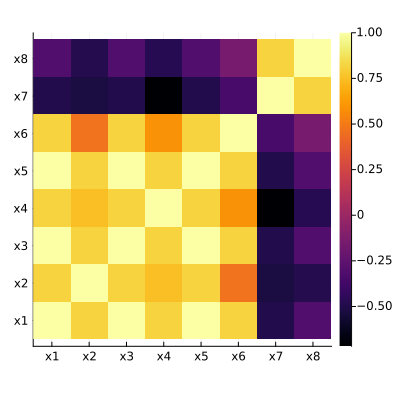

In [116]:
heatmap(names(aq_df), names(aq_df), cor_matrix,
aspect_ratio=:equal, size=(400,400),
rightmargin=5Plots.mm)

## Create dataframes step-by-step

In [117]:
v = collect(1:10)
y = collect(2:11)

10-element Vector{Int64}:
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11

In [118]:
DataFrame(x1 = v, x2 = y)

Row,x1,x2
,Int64,Int64
1,1,2
2,2,3
3,3,4
4,4,5
5,5,6
6,6,7
7,7,8
8,8,9
9,9,10


In [119]:
reduce(*, collect(1:10))

3628800

In [120]:
1 * 2 * 3 * 4 * 5 * 6 * 7 * 8 * 9 * 10

3628800

In [121]:
reduce(+, collect(1:100))

5050

In [122]:
sum = 0

for number in 1:100
    sum = sum + number
end

println(sum)

5050


In [123]:
df1 = DataFrame(a = 1:10, b = 11:20)

Row,a,b
,Int64,Int64
1,1,11
2,2,12
3,3,13
4,4,14
5,5,15
6,6,16
7,7,17
8,8,18
9,9,19


In [124]:
df2 = DataFrame(c = 1:40, d = 2:41)

Row,c,d
,Int64,Int64
1,1,2
2,2,3
3,3,4
4,4,5
5,5,6
6,6,7
7,7,8
8,8,9
9,9,10


Now in order to combine the two dataframes

In [125]:
df3 = vcat(df1, df2, cols=:union)

Row,a,b,c,d
,Int64?,Int64?,Int64?,Int64?
1,1,11,missing,missing
2,2,12,missing,missing
3,3,13,missing,missing
4,4,14,missing,missing
5,5,15,missing,missing
6,6,16,missing,missing
7,7,17,missing,missing
8,8,18,missing,missing
9,9,19,missing,missing


To append horizontally (rbind in R):

In [126]:
df1 = DataFrame(x = 1:10, y = 2:11)

Row,x,y
,Int64,Int64
1,1,2
2,2,3
3,3,4
4,4,5
5,5,6
6,6,7
7,7,8
8,8,9
9,9,10


In [127]:
df2 = DataFrame(x = 5:10, y = 6:11)

Row,x,y
,Int64,Int64
1,5,6
2,6,7
3,7,8
4,8,9
5,9,10
6,10,11


In [128]:
df3 = append!(df1, df2)

Row,x,y
,Int64,Int64
1,1,2
2,2,3
3,3,4
4,4,5
5,5,6
6,6,7
7,7,8
8,8,9
9,9,10


Adding a new row to dataframe with `push`

In [129]:
push!(df3, (x = 100, y = 200))

Row,x,y
,Int64,Int64
1,1,2
2,2,3
3,3,4
4,4,5
5,5,6
6,6,7
7,7,8
8,8,9
9,9,10


## Other dataframe transformations

In [130]:
df = DataFrame(CSV.File("ky_owensboro_2020_04_01.csv", missingstring="NA"))

Row,raw_row_number,date,time,location,lat,lng,sector,subject_age,subject_race,subject_sex,officer_id_hash,type,violation,arrest_made,citation_issued,outcome,vehicle_registration_state,raw_race
,Int64,Date,Time,String,Float64,Float64?,String15?,Int64?,String31?,String7,String15,String15?,String,Bool,Bool,String15,String3?,String31?
1,1,2016-08-04,13:52:00,"1016 HALL ST, OWENSBORO, KY, 42301",37.7673,-87.0977,BRAVO,30,white,male,0b087b613e,pedestrian,"POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE); DRUG PARAPHERLIA - BUY/POSSESS",true,true,arrest,KY,WHITE
2,2,2016-04-03,01:48:00,"W PARRISH AVE/BYPASS, OWENSBORO, KY, 42301",37.7557,-87.1561,WEST,17,white,male,cccb830893,vehicular,FAILURE TO ILLUMITE HEAD LAMPS; NO OPERATORS-MOPED LICENSE; NO REGISTRATION PLATES,false,true,citation,KY,WHITE
3,3,2015-09-13,04:57:00,"2511 HWY 144 ST, OWENSBORO, KY, 42303",37.7777,-87.0871,BRAVO,33,white,male,5ad1b66604,vehicular,"NO TAIL LAMPS; OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF; POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE); FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF; VIOLATION UNKNOWN",true,true,arrest,KY,WHITE
4,4,2016-01-05,13:16:00,"CARTER RD & BITTEL RD, OWENSBORO, KY, 42301",37.7514,-87.1468,CHARLIE,52,white,female,78fbcbf614,vehicular,"OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND; DRIVING DUI SUSPENDED LICENSE - 1ST OFF (AGG CIRCUM)",true,true,arrest,KY,WHITE
5,5,2016-04-06,02:15:00,"FREDERICA ST & FAIRFAX DR, OWENSBORO, KY, 42301",37.734,-87.1202,FOX,33,white,male,78fbcbf614,vehicular,OPERATING ON SUS OR REV OPER LICENSE,false,true,citation,KY,WHITE
6,6,2015-11-05,23:15:00,"FREDERICA ST AND WASHINGTON AVE, OWENSBORO, KY, 42303",37.7513,-87.1116,DELTA,32,white,male,60dc0a01bb,vehicular,FAILURE TO WEAR SEAT BELTS,false,true,citation,KY,WHITE
7,7,2016-02-14,02:40:00,"1301 FREDERICA ST, OWENSBORO, KY, 42301",37.7635,-87.1125,DELTA,28,white,male,60dc0a01bb,vehicular,OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF,true,true,arrest,KY,WHITE
8,8,2016-02-09,16:59:00,"1300 MCFARLAND AVE, OWENSBORO, KY, 42301",37.759,-87.146,CHARLIE,24,white,male,fbd3670efb,vehicular,DISREGARDING TRAFFIC CONT DEV-TRAFFIC LIGHT; LICENSE TO BE IN POSSESSION,false,true,citation,KY,WHITE
9,9,2016-04-16,23:14:00,"700 CRABTREE AVE, OWENSBORO, KY, 42301",37.7677,-87.1342,ALPHA,23,white,female,fbd3670efb,vehicular,"OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND; DRIVING ON DUI SUSPENDED LICENSE -1ST OFFENSE; POSS OF OPEN ALC BEVERAGE CONT IN MOTOR VEH PROHIBITED; FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF; FAILURE TO WEAR SEAT BELTS",true,true,arrest,KY,WHITE


In [131]:
owensboro = df

Row,raw_row_number,date,time,location,lat,lng,sector,subject_age,subject_race,subject_sex,officer_id_hash,type,violation,arrest_made,citation_issued,outcome,vehicle_registration_state,raw_race
,Int64,Date,Time,String,Float64,Float64?,String15?,Int64?,String31?,String7,String15,String15?,String,Bool,Bool,String15,String3?,String31?
1,1,2016-08-04,13:52:00,"1016 HALL ST, OWENSBORO, KY, 42301",37.7673,-87.0977,BRAVO,30,white,male,0b087b613e,pedestrian,"POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE); DRUG PARAPHERLIA - BUY/POSSESS",true,true,arrest,KY,WHITE
2,2,2016-04-03,01:48:00,"W PARRISH AVE/BYPASS, OWENSBORO, KY, 42301",37.7557,-87.1561,WEST,17,white,male,cccb830893,vehicular,FAILURE TO ILLUMITE HEAD LAMPS; NO OPERATORS-MOPED LICENSE; NO REGISTRATION PLATES,false,true,citation,KY,WHITE
3,3,2015-09-13,04:57:00,"2511 HWY 144 ST, OWENSBORO, KY, 42303",37.7777,-87.0871,BRAVO,33,white,male,5ad1b66604,vehicular,"NO TAIL LAMPS; OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF; POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE); FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF; VIOLATION UNKNOWN",true,true,arrest,KY,WHITE
4,4,2016-01-05,13:16:00,"CARTER RD & BITTEL RD, OWENSBORO, KY, 42301",37.7514,-87.1468,CHARLIE,52,white,female,78fbcbf614,vehicular,"OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND; DRIVING DUI SUSPENDED LICENSE - 1ST OFF (AGG CIRCUM)",true,true,arrest,KY,WHITE
5,5,2016-04-06,02:15:00,"FREDERICA ST & FAIRFAX DR, OWENSBORO, KY, 42301",37.734,-87.1202,FOX,33,white,male,78fbcbf614,vehicular,OPERATING ON SUS OR REV OPER LICENSE,false,true,citation,KY,WHITE
6,6,2015-11-05,23:15:00,"FREDERICA ST AND WASHINGTON AVE, OWENSBORO, KY, 42303",37.7513,-87.1116,DELTA,32,white,male,60dc0a01bb,vehicular,FAILURE TO WEAR SEAT BELTS,false,true,citation,KY,WHITE
7,7,2016-02-14,02:40:00,"1301 FREDERICA ST, OWENSBORO, KY, 42301",37.7635,-87.1125,DELTA,28,white,male,60dc0a01bb,vehicular,OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF,true,true,arrest,KY,WHITE
8,8,2016-02-09,16:59:00,"1300 MCFARLAND AVE, OWENSBORO, KY, 42301",37.759,-87.146,CHARLIE,24,white,male,fbd3670efb,vehicular,DISREGARDING TRAFFIC CONT DEV-TRAFFIC LIGHT; LICENSE TO BE IN POSSESSION,false,true,citation,KY,WHITE
9,9,2016-04-16,23:14:00,"700 CRABTREE AVE, OWENSBORO, KY, 42301",37.7677,-87.1342,ALPHA,23,white,female,fbd3670efb,vehicular,"OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND; DRIVING ON DUI SUSPENDED LICENSE -1ST OFFENSE; POSS OF OPEN ALC BEVERAGE CONT IN MOTOR VEH PROHIBITED; FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF; FAILURE TO WEAR SEAT BELTS",true,true,arrest,KY,WHITE


Now, we will get some information about the dataframe

In [132]:
summary(owensboro)

"6921×18 DataFrame"

In [133]:
describe(owensboro, :nunique, :nmissing, :eltype) # Give the number of unique values, the number of missing ones, and the element type

Row,variable,nunique,nmissing,eltype
,Symbol,Union…,Int64,Type
1,raw_row_number,,0,Int64
2,date,726,0,Date
3,time,1352,0,Time
4,location,4481,0,String
5,lat,,0,Float64
6,lng,,9,"Union{Missing, Float64}"
7,sector,10,10,"Union{Missing, String15}"
8,subject_age,,3,"Union{Missing, Int64}"
9,subject_race,4,18,"Union{Missing, String31}"


In [134]:
df_part = select!(owensboro, :date, :type, :arrest_made, :violation) # We select inplace the columns we will use for downstream analysis

Row,date,type,arrest_made,violation
,Date,String15?,Bool,String
1,2016-08-04,pedestrian,true,"POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE); DRUG PARAPHERLIA - BUY/POSSESS"
2,2016-04-03,vehicular,false,FAILURE TO ILLUMITE HEAD LAMPS; NO OPERATORS-MOPED LICENSE; NO REGISTRATION PLATES
3,2015-09-13,vehicular,true,"NO TAIL LAMPS; OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF; POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE); FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF; VIOLATION UNKNOWN"
4,2016-01-05,vehicular,true,"OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND; DRIVING DUI SUSPENDED LICENSE - 1ST OFF (AGG CIRCUM)"
5,2016-04-06,vehicular,false,OPERATING ON SUS OR REV OPER LICENSE
6,2015-11-05,vehicular,false,FAILURE TO WEAR SEAT BELTS
7,2016-02-14,vehicular,true,OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF
8,2016-02-09,vehicular,false,DISREGARDING TRAFFIC CONT DEV-TRAFFIC LIGHT; LICENSE TO BE IN POSSESSION
9,2016-04-16,vehicular,true,"OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND; DRIVING ON DUI SUSPENDED LICENSE -1ST OFFENSE; POSS OF OPEN ALC BEVERAGE CONT IN MOTOR VEH PROHIBITED; FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF; FAILURE TO WEAR SEAT BELTS"


In [135]:
sort(df_part, :date, rev=true) # Sort based on the most recent incident

Row,date,type,arrest_made,violation
,Date,String15?,Bool,String
1,2017-09-01,vehicular,false,NO REGISTRATION PLATES
2,2017-09-01,vehicular,false,SPEEDING 15 MPH OVER LIMIT
3,2017-09-01,vehicular,false,SPEEDING 15 MPH OVER LIMIT
4,2017-09-01,vehicular,false,DISREGARDING TRAFFIC CONT DEV-TRAFFIC LIGHT; OPERATING ON SUS OR REV OPER LICENSE
5,2017-09-01,vehicular,false,NO REGISTRATION PLATES; FAILURE TO PRODUCE INSURANCE CARD; OPERATING ON SUS OR REV OPER LICENSE
6,2017-09-01,vehicular,false,"NO REGISTRATION PLATES; FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF"
7,2017-09-01,vehicular,false,DISREGARDING TRAFFIC CONT DEV-TRAFFIC LIGHT
8,2017-08-31,vehicular,false,DISREGARDING STOP SIGN
9,2017-08-30,vehicular,false,SPEEDING 10 MPH OVER LIMIT


In [136]:
sort(df_part, [:date, :violation], rev=true) # Now we sort based on date and violation in reverse order

Row,date,type,arrest_made,violation
,Date,String15?,Bool,String
1,2017-09-01,vehicular,false,SPEEDING 15 MPH OVER LIMIT
2,2017-09-01,vehicular,false,SPEEDING 15 MPH OVER LIMIT
3,2017-09-01,vehicular,false,NO REGISTRATION PLATES; FAILURE TO PRODUCE INSURANCE CARD; OPERATING ON SUS OR REV OPER LICENSE
4,2017-09-01,vehicular,false,"NO REGISTRATION PLATES; FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF"
5,2017-09-01,vehicular,false,NO REGISTRATION PLATES
6,2017-09-01,vehicular,false,DISREGARDING TRAFFIC CONT DEV-TRAFFIC LIGHT; OPERATING ON SUS OR REV OPER LICENSE
7,2017-09-01,vehicular,false,DISREGARDING TRAFFIC CONT DEV-TRAFFIC LIGHT
8,2017-08-31,vehicular,false,DISREGARDING STOP SIGN
9,2017-08-30,vehicular,false,"SPEEDING 17 MPH OVER LIMIT; FAILURE TO WEAR SEAT BELTS; LICENSE TO BE IN POSSESSION; FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF; NO REGISTRATION PLATES; NO REGISTRATION RECEIPT"


In [137]:
df1 = DataFrame(x = [1,2,3,4])

Row,x
,Int64
1,1
2,2
3,3
4,4


In [138]:
Pkg.add("DataFramesMeta")

   Resolving package versions...


  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Project.toml`
  No Changes to `~/anaconda3/envs/julia_env/share/julia/environments/julia_env/Manifest.toml`


In [139]:
using DataFramesMeta

In [140]:
@rselect(df1, :sqrt_x = sqrt(:x))

Row,sqrt_x
,Float64
1,1.0
2,1.41421
3,1.73205
4,2.0


In [141]:
select(df1, :x => ByRow(sqrt) => :sqrt_x)

Row,sqrt_x
,Float64
1,1.0
2,1.41421
3,1.73205
4,2.0


In [142]:
df1 |> 
    @mutate(sqrt_x = sqrt(_.x)) |>
    DataFrame

Row,x,sqrt_x
,Int64,Float64
1,1,1.0
2,2,1.41421
3,3,1.73205
4,4,2.0


## Calculating mean, median and std (using the Statistics module)

We create the pizza table from "Julia as second language" from Manning

In [143]:
pizza = ["Pepperoni", "Margherita", "BBQ Chicken", "Hawaiian", "Prosciutto"]

5-element Vector{String}:
 "Pepperoni"
 "Margherita"
 "BBQ Chicken"
 "Hawaiian"
 "Prosciutto"

In [144]:
amounts = [4, 1, 5, 3, 2]

5-element Vector{Int64}:
 4
 1
 5
 3
 2

In [145]:
prices = [15.0, 11.5, 13.0, 12.75, 14.25]

5-element Vector{Float64}:
 15.0
 11.5
 13.0
 12.75
 14.25

In [146]:
pizza_df = DataFrame(Pizza = pizza, Amount = amounts, Price = prices)

Row,Pizza,Amount,Price
,String,Int64,Float64
1,Pepperoni,4,15.0
2,Margherita,1,11.5
3,BBQ Chicken,5,13.0
4,Hawaiian,3,12.75
5,Prosciutto,2,14.25


In [147]:
column_vector = [4, 1, 4, 3, 2]

5-element Vector{Int64}:
 4
 1
 4
 3
 2

In [148]:
row_vector = [4 1 4 3 2]

1×5 Matrix{Int64}:
 4  1  4  3  2

In [155]:
amounts = [4, 1, 5, 3, 2]

5-element Vector{Int64}:
 4
 1
 5
 3
 2

In [158]:
# Import the Statistics module
import Statistics as stats

In [163]:
stats.sum(amounts)

15

In [164]:
no_pizzas_sold = stats.sum(amounts)

15

In [165]:
no_pizzas_sold = stats.sum(pizza_df.Amount)

15

In [166]:
avg_pizzas_sold = no_pizzas_sold / length(amounts)

3.0

In [167]:
avg_pizzas_sold = stats.mean(pizza_df.Amount)

3.0

In [169]:
money_made = stats.sum(amounts .* prices)

203.25

In [172]:
using Statistics # This loads all the functions in the module and makes them available to use

In [173]:
mean(amounts)

3.0

In [174]:
median(amounts)

3.0

In [175]:
std(amounts)

1.5811388300841898

How do we find the type of elements?

In [176]:
eltype(amounts)

Int64

How do we find the type of the data structure?

In [177]:
typeof(amounts)

Vector{Int64} (alias for Array{Int64, 1})

## Create arrays

In [200]:
zeros_array = zeros(100)

100-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [201]:
ones_array = ones(100)

100-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [202]:
ones_int_array = ones(Int64, 100)

100-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [203]:
fortytwo_array = fill(42, 100)

100-element Vector{Int64}:
 42
 42
 42
 42
 42
 42
 42
 42
 42
 42
  ⋮
 42
 42
 42
 42
 42
 42
 42
 42
 42

In [208]:
random_array = rand(1:100, 100)

100-element Vector{Int64}:
 24
 82
 30
 96
 27
 11
 25
 28
 68
 26
  ⋮
 90
 84
 44
 77
 46
 70
 18
 26
 14

## Working with text

The `Char` type in Julia

In [178]:
a = 'A'

'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)

In [179]:
eltype(a)

Char

### Join vs. collect

In [181]:
join('A':'C')

"ABC"

In [183]:
letters = join('A':2:'Z') # Join every other letter from A to Z

"ACEGIKMOQSUWY"

In [185]:
letter_vector = collect(letters)

13-element Vector{Char}:
 'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)
 'C': ASCII/Unicode U+0043 (category Lu: Letter, uppercase)
 'E': ASCII/Unicode U+0045 (category Lu: Letter, uppercase)
 'G': ASCII/Unicode U+0047 (category Lu: Letter, uppercase)
 'I': ASCII/Unicode U+0049 (category Lu: Letter, uppercase)
 'K': ASCII/Unicode U+004B (category Lu: Letter, uppercase)
 'M': ASCII/Unicode U+004D (category Lu: Letter, uppercase)
 'O': ASCII/Unicode U+004F (category Lu: Letter, uppercase)
 'Q': ASCII/Unicode U+0051 (category Lu: Letter, uppercase)
 'S': ASCII/Unicode U+0053 (category Lu: Letter, uppercase)
 'U': ASCII/Unicode U+0055 (category Lu: Letter, uppercase)
 'W': ASCII/Unicode U+0057 (category Lu: Letter, uppercase)
 'Y': ASCII/Unicode U+0059 (category Lu: Letter, uppercase)

In [187]:
letter_vector[begin]

'A': ASCII/Unicode U+0041 (category Lu: Letter, uppercase)

In [188]:
letter_vector[end]

'Y': ASCII/Unicode U+0059 (category Lu: Letter, uppercase)

## Using reduce

In [192]:
factorial(10)

3628800

In [190]:
reduce(*, 1:10)

3628800

In [198]:
stats.sum(collect(1:100))

5050

In [199]:
reduce(+, 1:100)

5050